In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nprr
import geopandas as gpd
import plotly.express as px



#models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix,classification_report


#METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ TRW/ DATA SET.csv")

In [ ]:
data.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
data.tail()

,Domain,Area,Element,Item,Year,Unit,Value
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07
4348,Pesticides Use,Zimbabwe,Use,Pesticides (total),2016,tonnes of active ingredients,2185.07


In [ ]:
data.isna()

,Domain,Area,Element,Item,Year,Unit,Value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4344,False,False,False,False,False,False,False
4345,False,False,False,False,False,False,False
4346,False,False,False,False,False,False,False
4347,False,False,False,False,False,False,False


In [ ]:
data.shape

(4349, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [ ]:
data.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

In [ ]:



# Encode categorical columns using LabelEncoder
categorical_columns = ['Domain', 'Area', 'Element', 'Item', 'Unit']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features (X) and target (y)
X = data.drop(columns=['Value'])
y = data['Value']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **EDA**

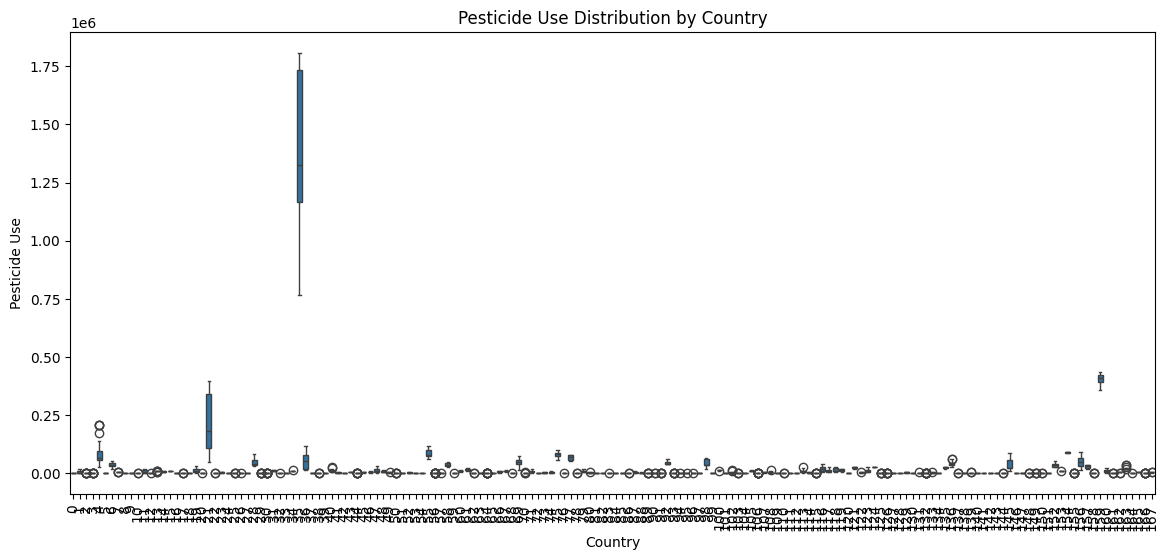

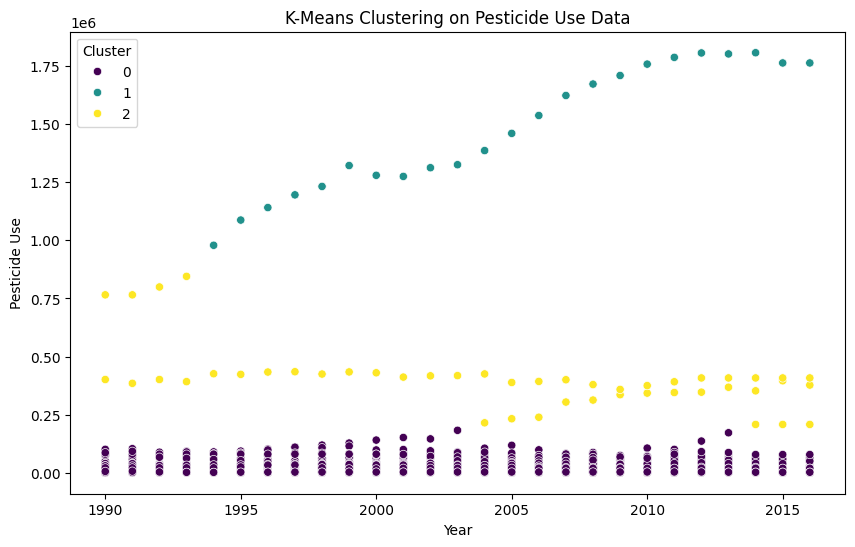

In [ ]:
 import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x='Area', y='Value', data=data)
plt.xticks(rotation=90)
plt.title("Pesticide Use Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Pesticide Use")
plt.show()


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = data[['Year', 'Value']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Year'], y=data['Value'], hue=data['Cluster'], palette='viridis')
plt.title("K-Means Clustering on Pesticide Use Data")
plt.xlabel("Year")
plt.ylabel("Pesticide Use")
plt.show()



Code for Training and Evaluation:
python
Copy code
# New section

# Random Forest Regressor

In [ ]:


# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



Mean Absolute Error: 1146.0347377011512
Mean Squared Error: 16766321.176258916
R2 Score: 0.9990472198806187


Data Visualization
# New section
Visualization helps us understand the predictions made by the model and assess its performance. Here's an example of plotting actual vs. predicted values:

<ipython-input-109-4af55fbdb391>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


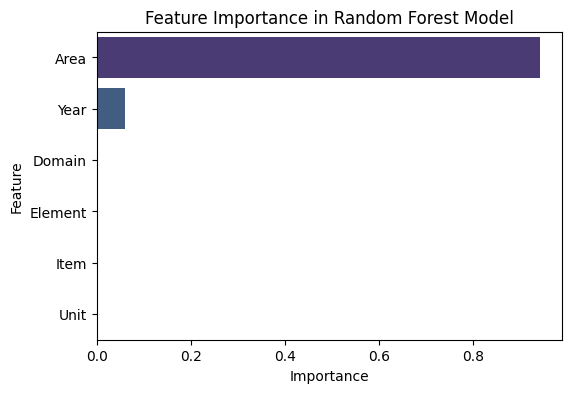

In [ ]:
# Feature importance
# Use X_train.columns instead of X.columns
feature_importances = pd.DataFrame({
    'Feature': X_train.columns, # Use X_train.columns instead of X.columns
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization: Feature Importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

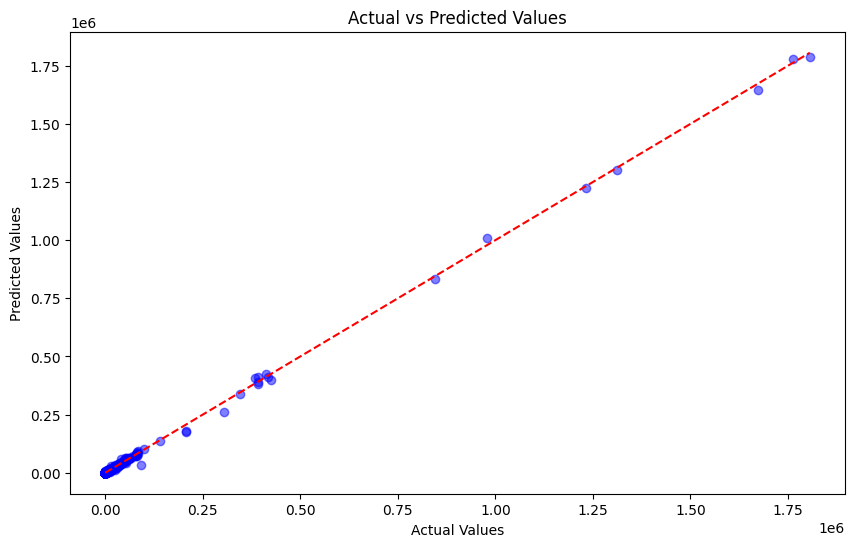

In [ ]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# **ROC and Confusion **

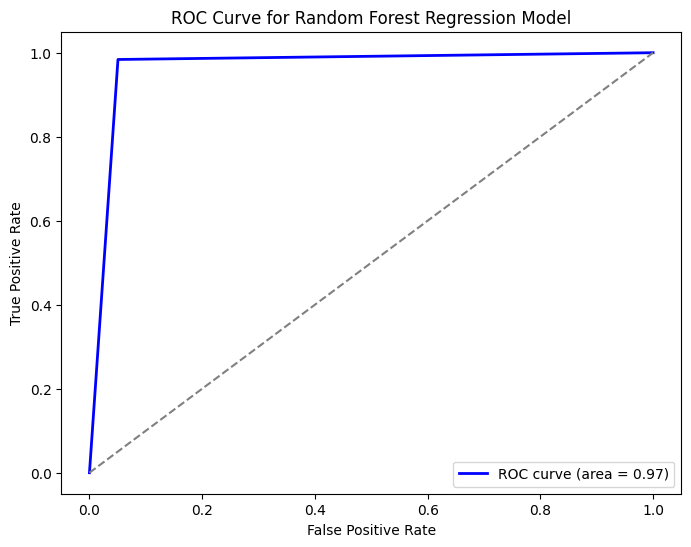

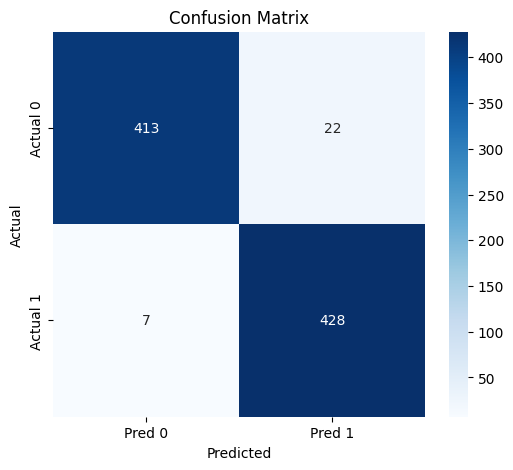

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Use the existing dataframe data
# No need to reload the data

# No need to re-encode categorical features since they are already encoded
# Define features and target variable
X = data.drop(columns=["Value"])  # Features
y = data["Value"]  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get predicted values
y_pred = rf_regressor.predict(X_test)

# Convert regression output to binary for ROC curve and confusion matrix (using median as threshold)
threshold = np.median(y_test)
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Regression Model')
plt.legend(loc='lower right')
plt.show()

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
categorical_columns = ['Domain', 'Area', 'Element', 'Item', 'Unit']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target variable
X = data.drop(columns=['Value'])
y = data['Value']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define KNN model
knn = KNeighborsRegressor()

# Hyperparameter tuning for the number of neighbors
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best number of neighbors
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors (k): {best_k}")

# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)


Optimal number of neighbors (k): 4


KNeighborsRegressor(n_neighbors=4)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = knn.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 12637.611399425288
Mean Squared Error: 478227870.3620061
R2 Score: 0.9728237338039206


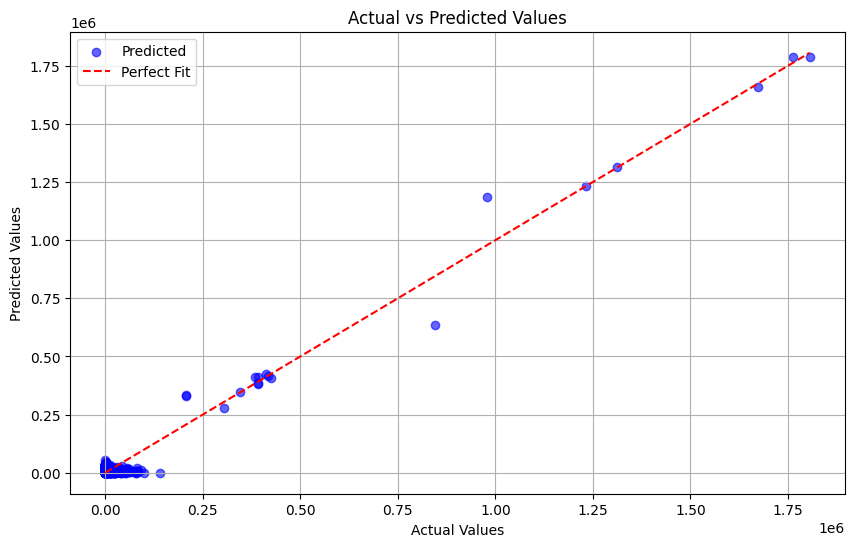

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


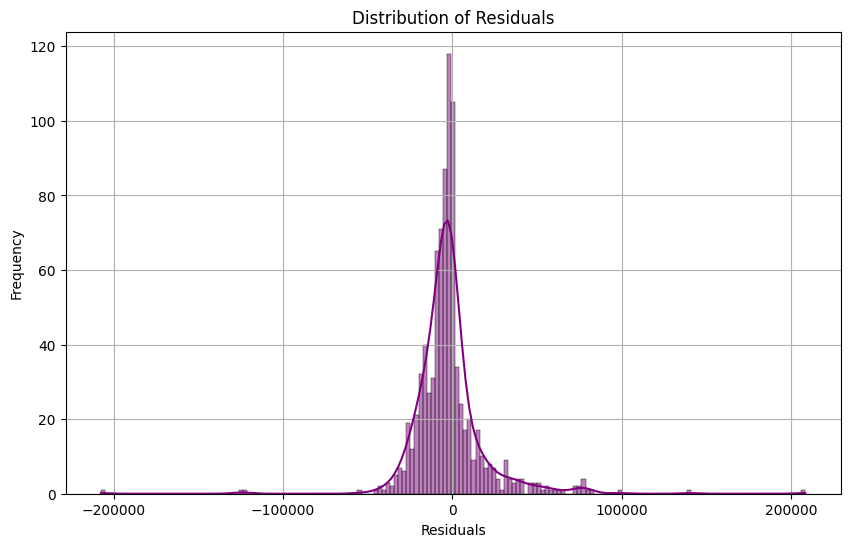

In [ ]:
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# roc and confusion

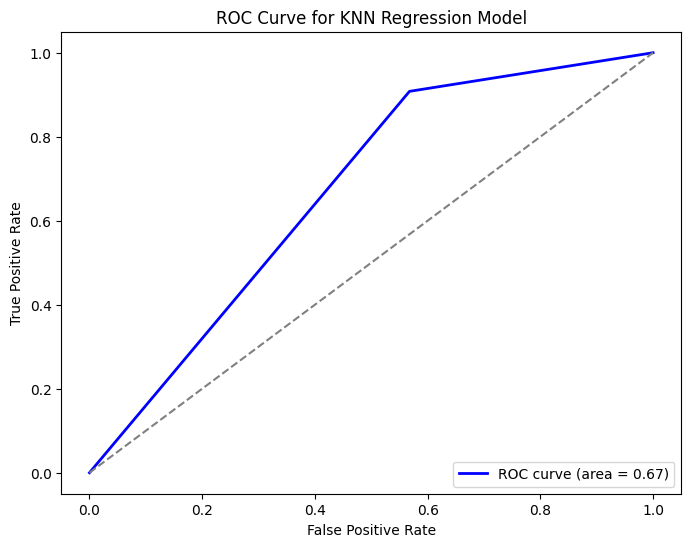

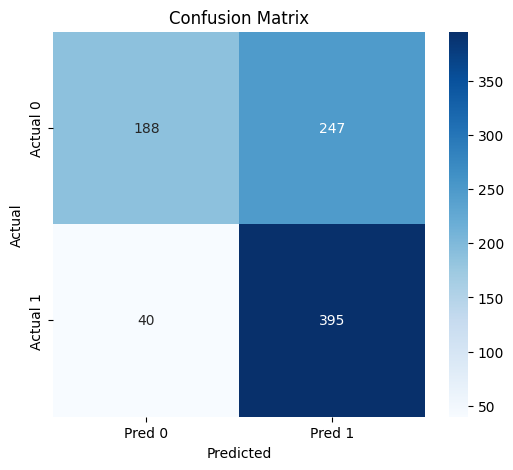

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Load dataset
file_path ="/content/drive/MyDrive/ TRW/ DATA SET.csv"
df = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
categorical_cols = ["Domain", "Area", "Element", "Item", "Unit"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=["Value"])  # Features
y = df["Value"]  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Get predicted values
y_pred = knn_regressor.predict(X_test)

# Convert regression output to binary for ROC curve and confusion matrix (using median as threshold)
threshold = np.median(y_test)
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Regression Model')
plt.legend(loc='lower right')
plt.show()

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
